In [2]:
import os
import random
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import seaborn as sns

from mibi_bin_tools import io_utils, bin_files

In [2]:
# single folder of multiple FOVs
data_dir = '/data/2021-12-14_run6/'

# Specify substring that all desired FOVs contain
moly_runs = io_utils.list_folders(base_dir, substrs=['Detector'])

# must be in the format of EL##
channel = 'Mo98'

panel = pd.DataFrame([{
    'Mass': int(channel[2:]),
    'Target': channel,
    'Start': float(channel[2:]) - 0.5,
    'Stop': float(channel[2:]) + 0.5,
}])

out_df = []

# specify # of FOVs
for fov in range(1, 30):
    print(f'\r{fov}...', end='')
    _, intensities, pulse_counts = bin_files.get_histograms_per_tof(data_dir, 'fov-{}-scan-1'.format(fov), channel, panel)
    
    int_bin = np.cumsum(intensities) / intensities.sum()
    median = (np.abs(int_bin - 0.5)).argmin()
    
    out_df.append({
        'fov': fov,
        'all_intensities': intensities,
        'all_pulse_counts': pulse_counts,
        'median_intensity': median,
    })
final_df = pd.DataFrame(out_df)

29...

In [2]:
# multiple folders of moly QC points
base_dir = '/data/20211215_detector_sweep/'

moly_runs = io_utils.list_folders(base_dir, substrs=['Detector'])

fov_name = 'fov-1-scan-1'

channel = 'Mo98'

panel = pd.DataFrame([{
    'Mass': int(channel[2:]),
    'Target': channel,
    'Start': float(channel[2:]) - 0.5,
    'Stop': float(channel[2:]) + 0.5,
}])

out_df = []
 
for moly_run in moly_runs:
    print(f'\r{moly_run}...', end='')
    data_dir = os.path.join(base_dir, moly_run)
    _, intensities, pulse_counts = bin_files.get_histograms_per_tof(data_dir, fov_name, channel, panel)
    
    int_bin = np.cumsum(intensities) / intensities.sum()
    median = (np.abs(int_bin - 0.5)).argmin()
    voltage = int(moly_run.split('_')[1][:-1])
    
    out_df.append({
        'voltage': voltage,
        'all_intensities': intensities,
        'all_pulse_counts': pulse_counts,
        'median_intensity': median,
    })
final_df = pd.DataFrame(out_df)

Detector_2650v_2021-12-15_09-40-12...

In [4]:
final_df.to_csv(os.path.join(base_dir, 'mph_counts.csv'))

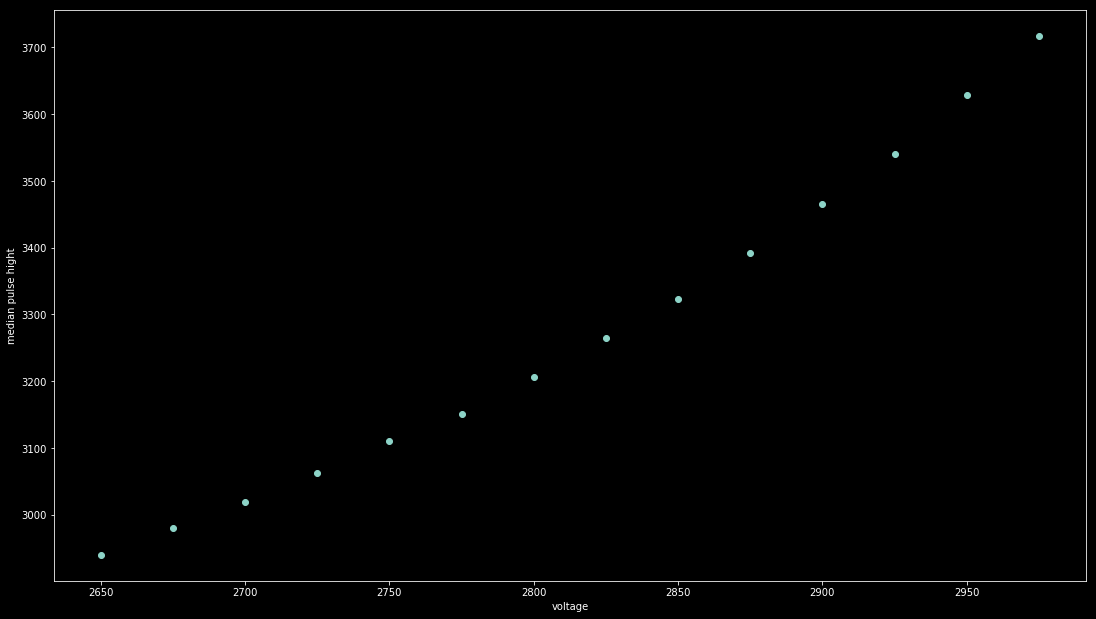

In [3]:
plt.style.use('dark_background')

plt.scatter(final_df['voltage'], final_df['median_intensity'])

#for date in final_df['actual date'].unique():
#    sub_df = final_df[final_df['actual date'] == date]
#    plt.plot(sub_df['aq_order'], sub_df['mean_pp'])
#ax = plt.plot(final_df['aq_order'], final_df['mean_pp'], c=dates, cmap='cool', marker='o')
plt.gca().set_xlabel('voltage')
plt.gca().set_ylabel('median pulse hight')
#plt.colorbar(ax)
plt.gcf().set_size_inches(18.5, 10.5)

In [47]:
def bin_array(arr, bin_factor):
    arr_bin = np.cumsum(arr)
    arr_bin[bin_factor:] = arr_bin[bin_factor:] - arr_bin[:-bin_factor]
    arr_bin = arr_bin[bin_factor::bin_factor]
    
    return arr_bin

final_df['binned_intensities'] = final_df['all_intensities'].apply(lambda x: bin_array(x, 100))
final_df


,detector_voltage,all_intensities,all_pulse_counts,median_intensity,binned_intensities
0,2325,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 247, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",2879,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2350,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1054, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2865,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2375,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 3248, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2924,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,2400,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 8192, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2972,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,2425,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 17971, 130, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,2450,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 36070, 473, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3088,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,2475,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 66734, 1525, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0...",3149,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,2500,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 115987, 4392, 87, 0, 0, 0, 0, 0, 0, 0, 0, ...",3222,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,2525,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 172844, 9473, 268, 4, 0, 0, 0, 0, 0, 0, 0,...",3302,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,2550,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 244837, 19129, 718, 11, 0, 0, 0, 0, 0, 0, ...",3385,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


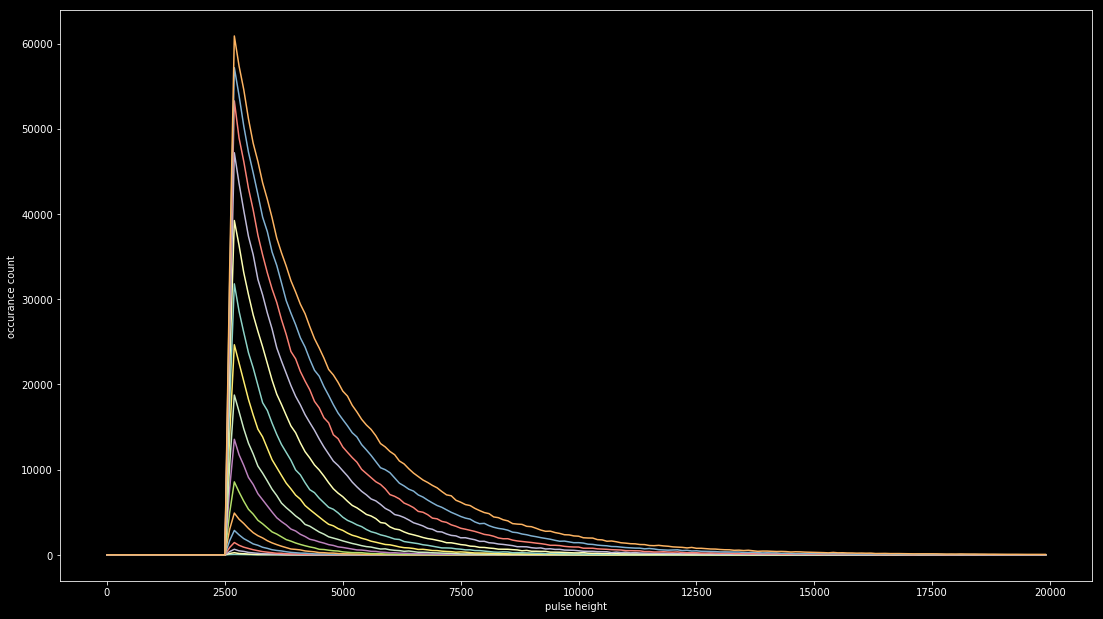

In [50]:
for idx, row in final_df.iterrows():
    plt.plot(np.arange(row['binned_intensities'].shape[0])[0:20000//100]*100, row['binned_intensities'][0:20000//100])
    #plt.plot(sub_df['aq_order'], sub_df['mean_pp'])
#ax = plt.plot(final_df['aq_order'], final_df['mean_pp'], c=dates, cmap='cool', marker='o')
plt.gca().set_xlabel('pulse height')
plt.gca().set_ylabel('occurance count')
#plt.colorbar(ax)
plt.gcf().set_size_inches(18.5, 10.5)